In [2]:
icfes <- read.csv("./data/icfes.csv", header=TRUE)
head(icfes)

dim(icfes)

COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_DEPTO_UBICACION,⋯,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
URBANO,N,B,TÉCNICO/ACADÉMICO,17228,3.76001e+11,3.76001e+11,76,76001,VALLE,⋯,15,4,1,20171,35,177,45,44,31,28
URBANO,,B,,663120,3.19001e+11,3.19001e+11,19,19001,CAUCA,⋯,78,62,85,20171,66,326,55,67,61,70
URBANO,S,B,ACADÉMICO,16741,3.76001e+11,3.76001e+11,76,76001,VALLE,⋯,91,99,76,20171,70,378,100,72,86,66
URBANO,S,B,ACADÉMICO,16741,3.76001e+11,3.76001e+11,76,76001,VALLE,⋯,96,96,100,20171,72,389,85,75,79,83
URBANO,S,B,ACADÉMICO,16741,3.76001e+11,3.76001e+11,76,76001,VALLE,⋯,38,35,63,20171,52,281,80,54,50,61
URBANO,S,B,ACADÉMICO,16741,3.76001e+11,3.76001e+11,76,76001,VALLE,⋯,78,95,89,20171,74,369,86,67,78,72


[1] 559253     81

In [3]:
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Defining the function, remove NA values by default
my.summary <- function(x, na.rm=TRUE){
  result <- c(Mean = mean(x, na.rm=na.rm),
              Median = median(x, na.rm=na.rm),
              #Var = var(x, na.rm=na.rm),
              SD = sd(x, na.rm=na.rm),
              Min = min(x, na.rm=na.rm),
              Max = max(x, na.rm=na.rm),
              Count = length(x))
    result <- round(result, digits=3)
}

# Defining the function, remove NA values by default
nominal.summary <- function(x, na.rm=TRUE){
  result <- c(Mode = as.character(Mode(x)), 
              occurrence_ratio = round(length(which(x == Mode(x))) / length(x), digits=3))
}

# Identifying numeric columns
ind <- sapply(icfes, is.numeric)
# Applying the summary function to numeric columns only
sapply(icfes[, ind], my.summary)

summarydata <- sapply(icfes[, !ind], nominal.summary)

mydata <- sapply(icfes[, ind], nominal.summary)

summarydata

,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,DESEMP_C_NATURALES,DESEMP_LECTURA_CRITICA,DESEMP_MATEMATICAS,DESEMP_SOCIALES_CIUDADANAS,ESTU_COD_DEPTO_PRESENTACION,⋯,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
Mean,140244.6,207888987620,208395798773,32.822,33054.51,2.228,2.693,2.421,2.170,32.758,⋯,50.478,50.490,50.504,20171.977,51.487,256.611,49.993,53.399,50.348,50.498
Median,97790.0,176001001753,176001002555,20.000,20550.00,2.000,3.000,2.000,2.000,20.000,⋯,51.000,51.000,51.000,20172.000,51.000,254.000,48.000,53.000,50.000,50.000
SD,170163.6,95415116580,96084041129,26.625,26649.11,0.737,0.713,0.764,0.794,26.678,⋯,28.895,28.886,28.863,0.151,10.201,49.340,11.994,9.889,12.156,11.264
Min,18.0,105001000001,105001000001,5.000,5001.00,1.000,1.000,1.000,1.000,5.000,⋯,1.000,1.000,1.000,20171.000,0.000,0.000,0.000,0.000,0.000,0.000
Max,711671.0,854874000001,854874000001,99.000,99773.00,4.000,4.000,4.000,4.000,99.000,⋯,100.000,100.000,100.000,20172.000,100.000,476.000,100.000,100.000,100.000,100.000
Count,559253.0,559253,559253,559253.000,559253.00,559253.000,559253.000,559253.000,559253.000,559253.000,⋯,559253.000,559253.000,559253.000,559253.000,559253.000,559253.000,559253.000,559253.000,559253.000,559253.000


,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,⋯,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEMOTOCICLETA,FAMI_TIENESERVICIOTV,FAMI_TRABAJOLABORMADRE,FAMI_TRABAJOLABORPADRE
Mode,URBANO,N,A,ACADÉMICO,BOGOTA,MIXTO,MAÑANA,BOGOTÁ D.C.,OFICIAL,INST EDUC CEFA,⋯,No,Si,No,No,,Si,No,Si,"Trabaja en el hogar, no trabaja o estudia","Es agricultor, pesquero o jornalero"
occurrence_ratio,0.85,0.841,0.97,0.539,0.163,0.963,0.493,0.163,0.736,0.002,⋯,0.749,0.567,0.753,0.531,0.977,0.711,0.586,0.691,0.411,0.139


In [4]:
dim(summarydata)

summarydata[c(1,2), c(1:50)]

[1]  2 53

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,⋯,FAMI_NUMLIBROS,FAMI_PERSONASHOGAR,FAMI_SITUACIONECONOMICA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEMOTOCICLETA
Mode,URBANO,N,A,ACADÉMICO,BOGOTA,MIXTO,MAÑANA,BOGOTÁ D.C.,OFICIAL,INST EDUC CEFA,⋯,0 A 10 LIBROS,3 a 4,Igual,No,Si,No,No,,Si,No
occurrence_ratio,0.85,0.841,0.97,0.539,0.163,0.963,0.493,0.163,0.736,0.002,⋯,0.395,0.466,0.604,0.749,0.567,0.753,0.531,0.977,0.711,0.586


In [5]:
# Correlation
print("***  Correlation ***")
correlation <- cor(icfes[, ind])
round(correlation, digits=3)

[1] "***  Correlation ***"


,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,DESEMP_C_NATURALES,DESEMP_LECTURA_CRITICA,DESEMP_MATEMATICAS,DESEMP_SOCIALES_CIUDADANAS,ESTU_COD_DEPTO_PRESENTACION,⋯,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
COLE_CODIGO_ICFES,1.000,0.009,0.012,-0.003,-0.002,-0.115,-0.106,-0.120,-0.109,-0.006,⋯,-0.109,-0.125,-0.109,0.072,-0.125,-0.136,-0.128,-0.115,-0.131,-0.117
COLE_COD_DANE_ESTABLECIMIENTO,0.009,1.000,0.987,0.218,0.218,0.084,0.076,0.068,0.095,0.212,⋯,0.062,0.058,0.072,-0.242,0.094,0.109,0.177,0.083,0.086,0.101
COLE_COD_DANE_SEDE,0.012,0.987,1.000,0.218,0.217,0.082,0.074,0.066,0.093,0.211,⋯,0.059,0.056,0.070,-0.240,0.092,0.107,0.175,0.080,0.084,0.099
COLE_COD_DEPTO_UBICACION,-0.003,0.218,0.218,1.000,1.000,-0.008,-0.030,-0.024,-0.029,0.984,⋯,-0.039,-0.035,-0.041,-0.092,-0.010,-0.030,-0.049,-0.032,-0.027,-0.032
COLE_COD_MCPIO_UBICACION,-0.002,0.218,0.217,1.000,1.000,-0.009,-0.031,-0.026,-0.031,0.984,⋯,-0.040,-0.036,-0.042,-0.091,-0.011,-0.032,-0.051,-0.033,-0.028,-0.033
DESEMP_C_NATURALES,-0.115,0.084,0.082,-0.008,-0.009,1.000,0.632,0.680,0.691,-0.010,⋯,0.685,0.729,0.726,-0.156,0.919,0.843,0.628,0.694,0.741,0.737
DESEMP_LECTURA_CRITICA,-0.106,0.076,0.074,-0.030,-0.031,0.632,1.000,0.628,0.686,-0.031,⋯,0.900,0.675,0.730,-0.126,0.688,0.820,0.606,0.913,0.683,0.736
DESEMP_MATEMATICAS,-0.120,0.068,0.066,-0.024,-0.026,0.680,0.628,1.000,0.650,-0.026,⋯,0.680,0.912,0.689,-0.133,0.735,0.835,0.601,0.686,0.920,0.695
DESEMP_SOCIALES_CIUDADANAS,-0.109,0.095,0.093,-0.029,-0.031,0.691,0.686,0.650,1.000,-0.031,⋯,0.746,0.701,0.920,-0.146,0.747,0.858,0.632,0.752,0.710,0.930
ESTU_COD_DEPTO_PRESENTACION,-0.006,0.212,0.211,0.984,0.984,-0.010,-0.031,-0.026,-0.031,1.000,⋯,-0.040,-0.036,-0.042,-0.088,-0.011,-0.032,-0.053,-0.034,-0.028,-0.034


Warning message in n * h:
“NAs producidos por enteros excedidos”

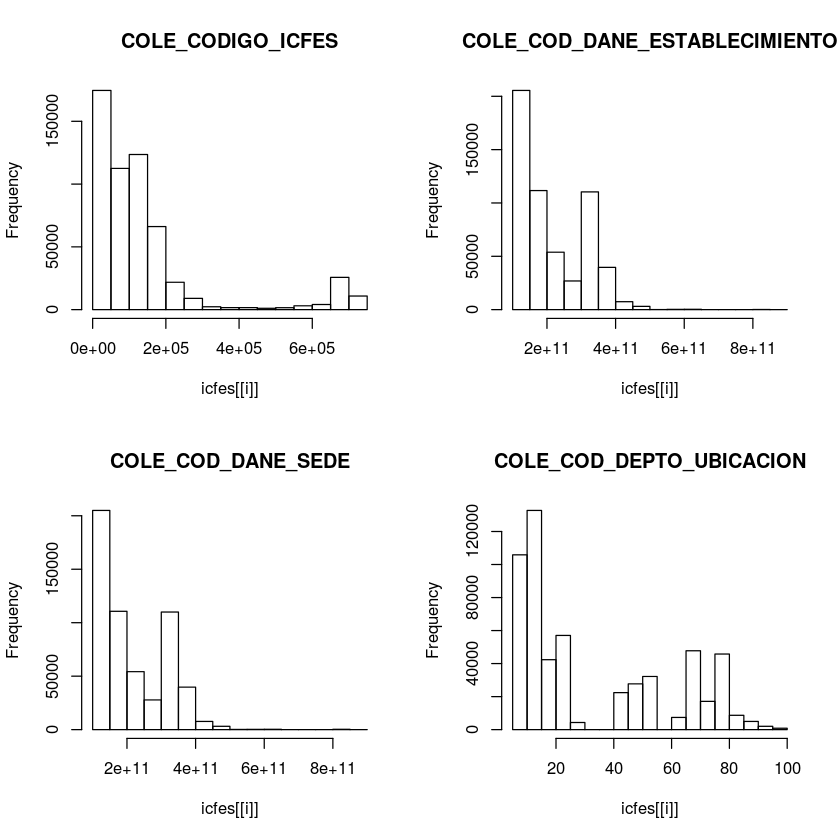

Warning message in n * h:
“NAs producidos por enteros excedidos”Warning message in n * h:
“NAs producidos por enteros excedidos”

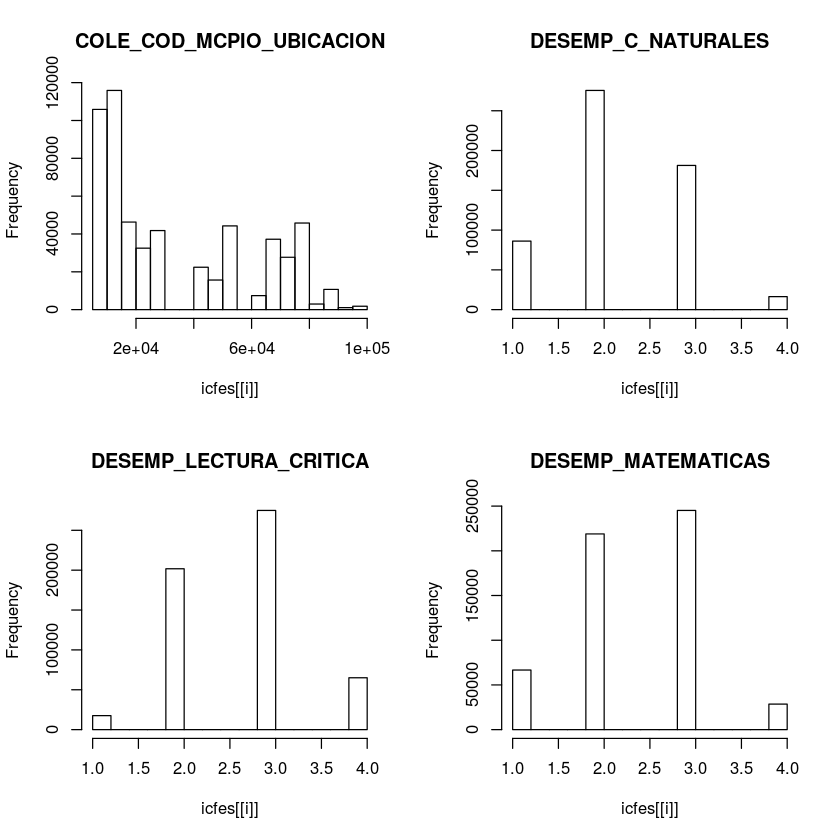

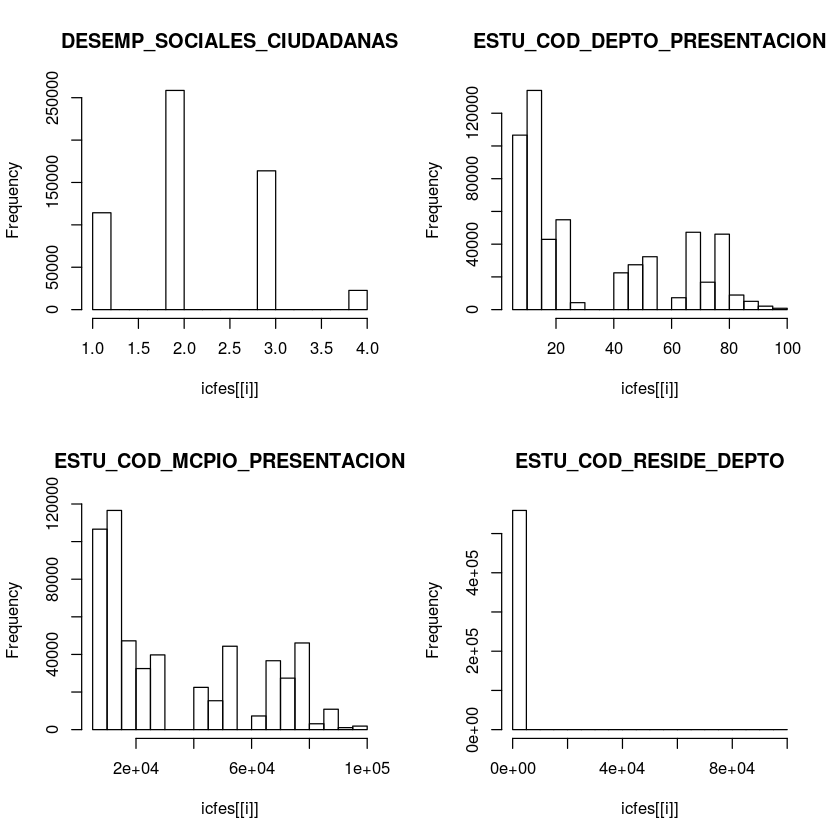

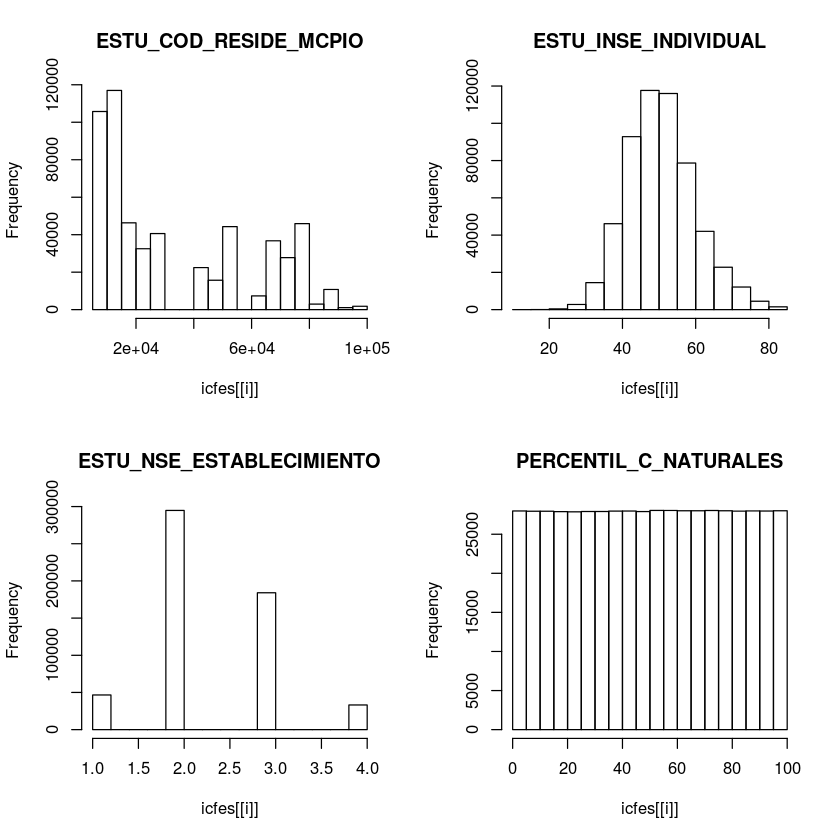

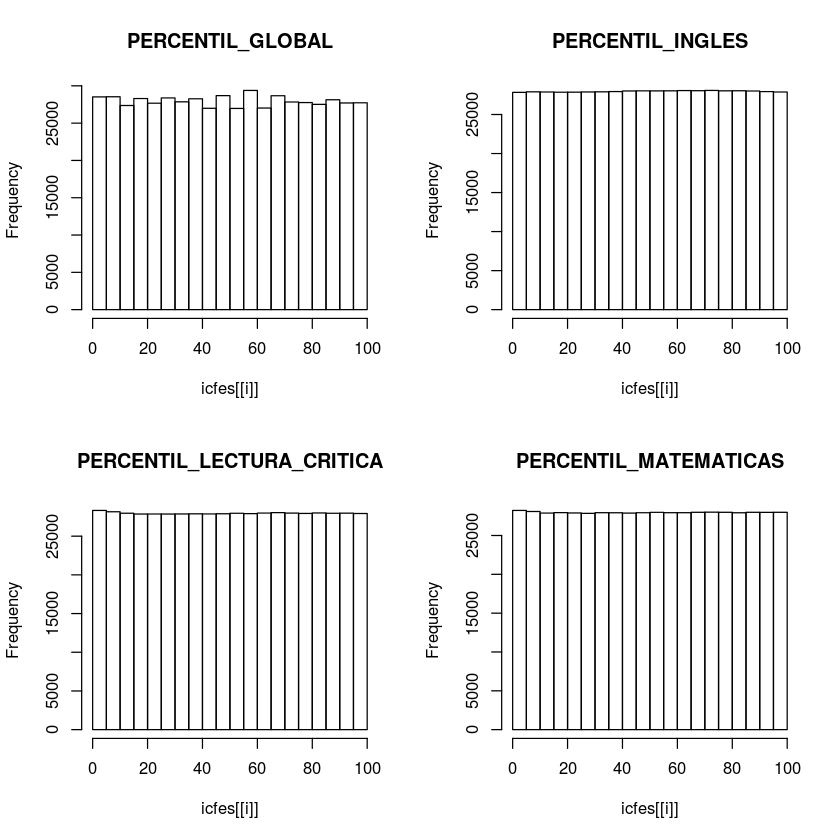

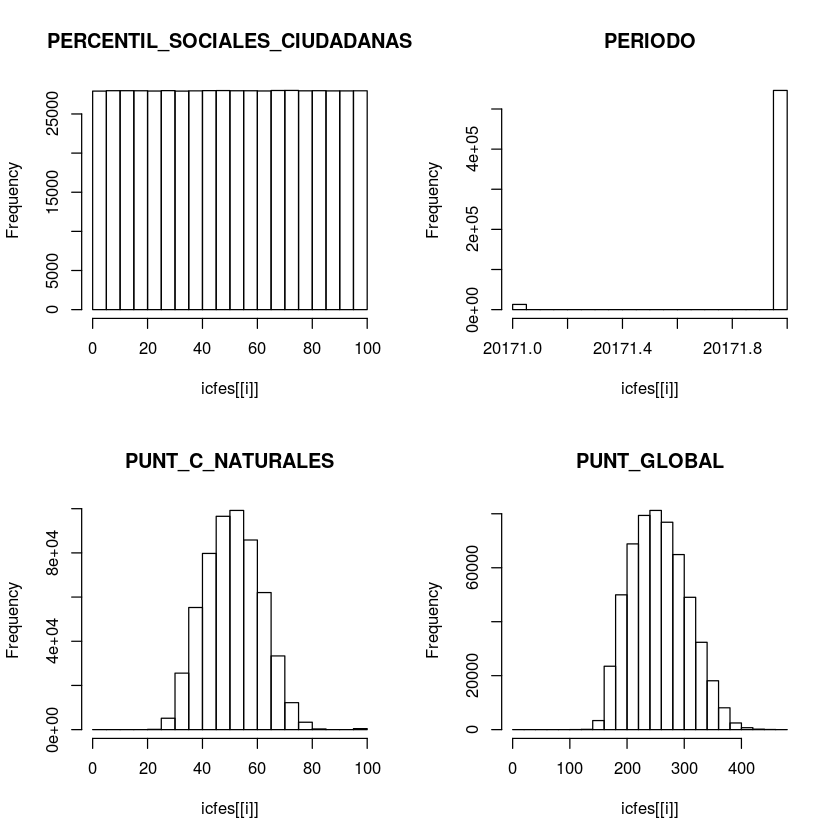

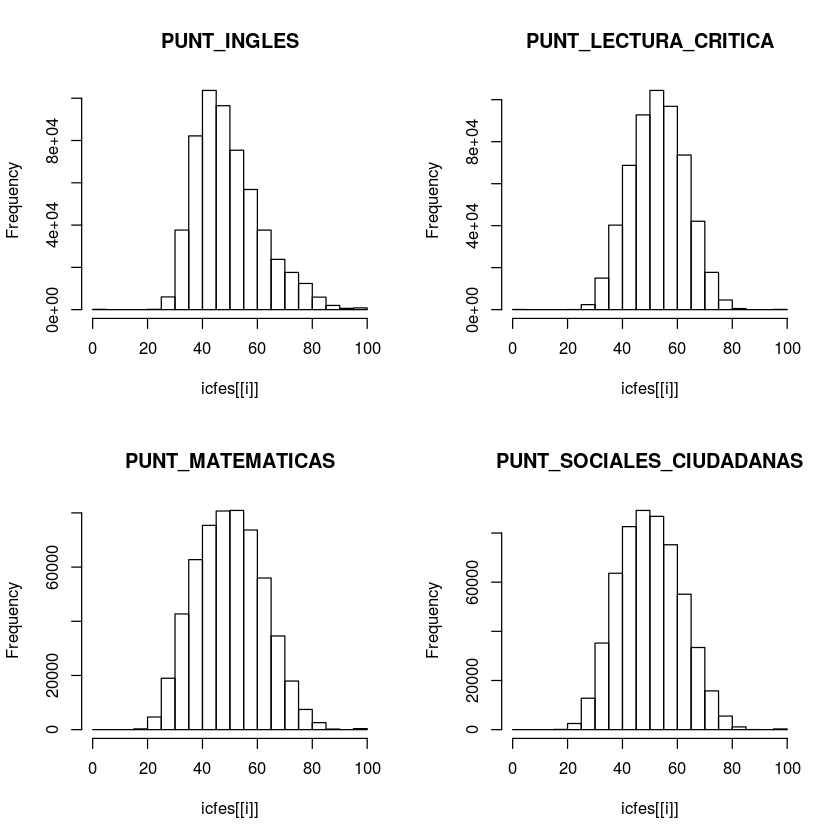

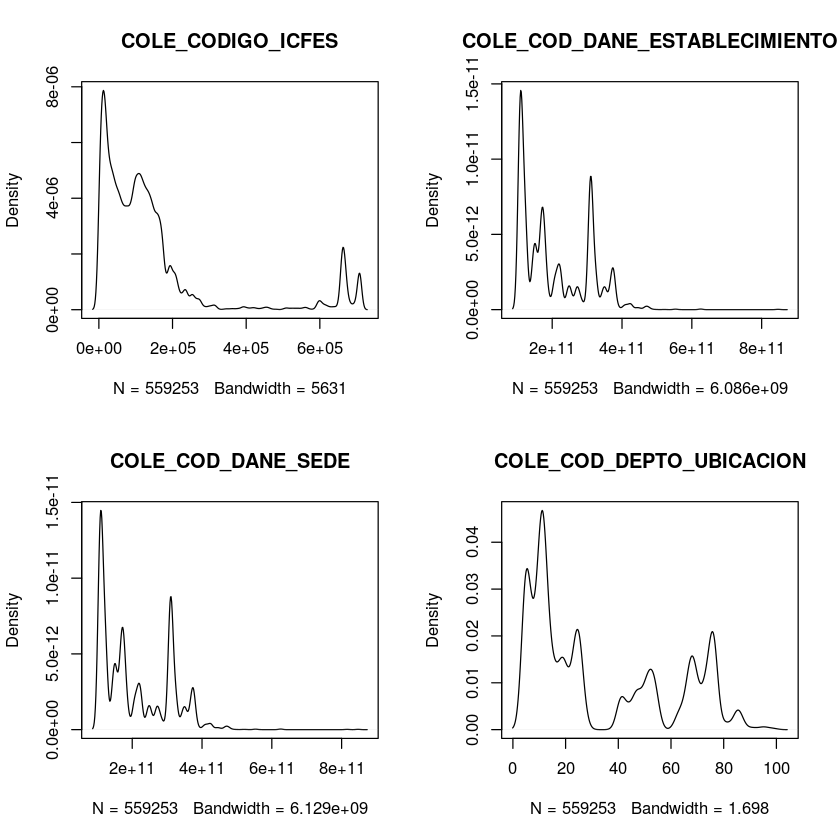

ERROR: Error in density.default(icfes[[i]]): 'x' contains missing values


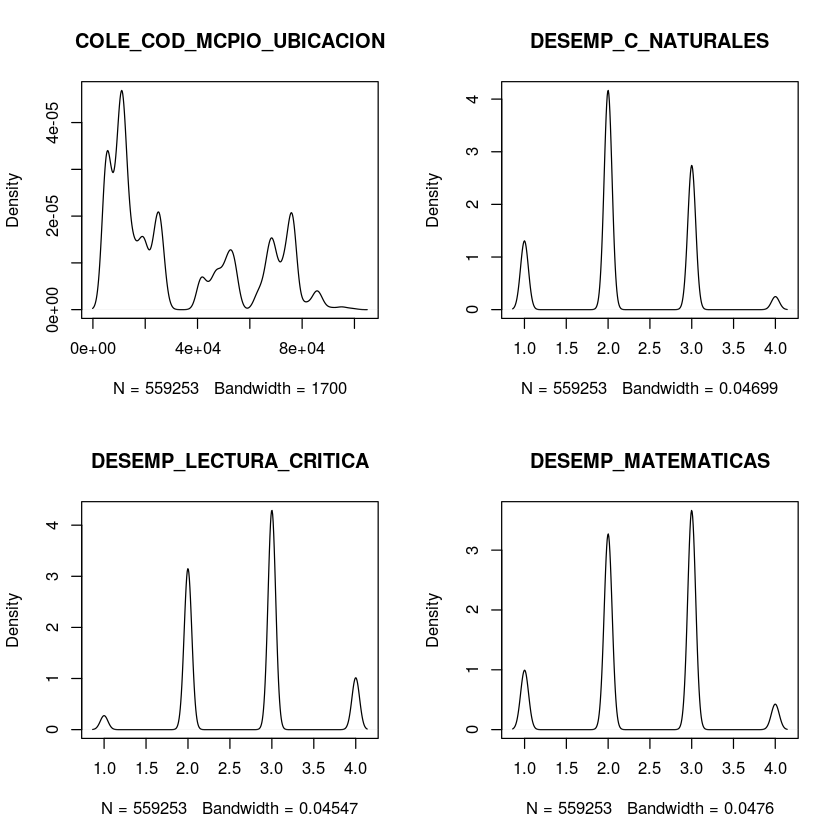

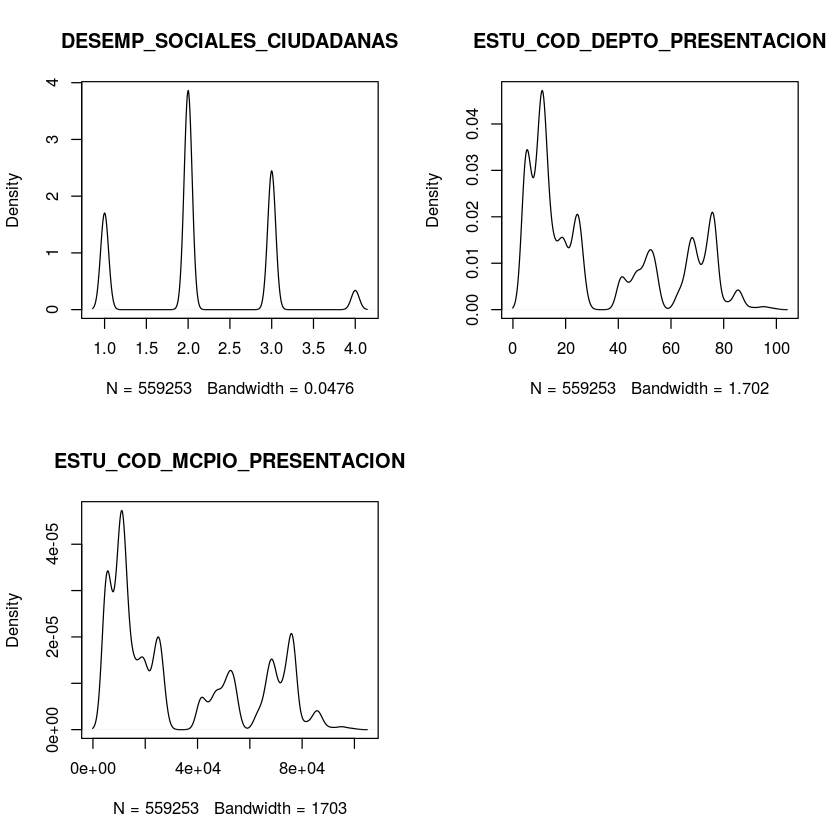

In [6]:
# Combine multiple plots
par(mfrow=c(2,2))

# Histograms and density plots
for(i in names(icfes[, ind])){
    hist(icfes[[i]], main=i)
}

for(i in names(icfes[, ind])){
    plot(density(icfes[[i]]), main=i)
}

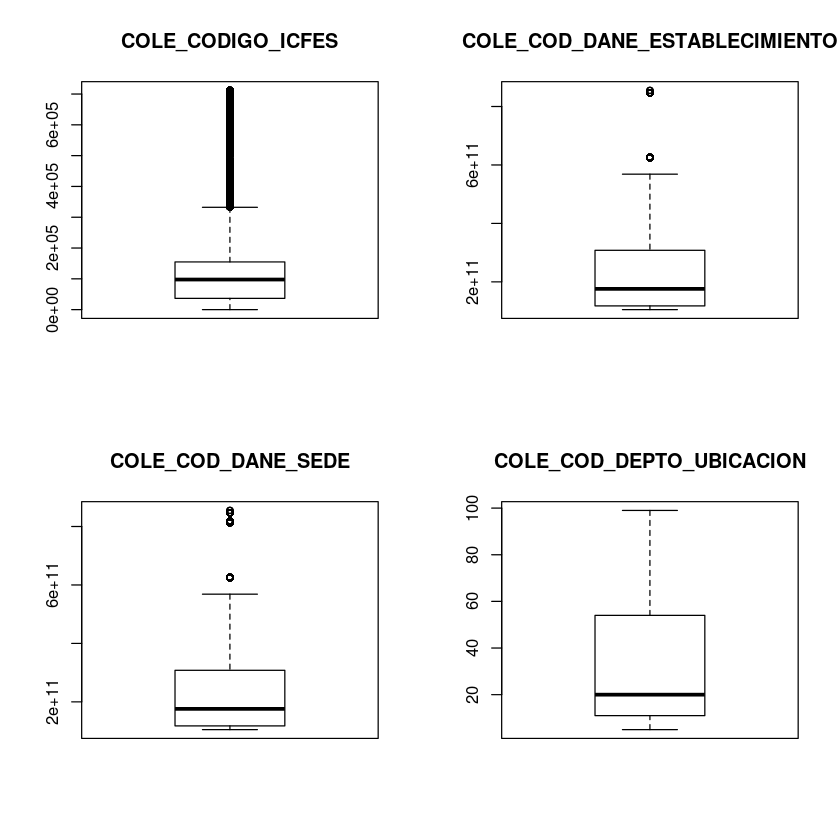

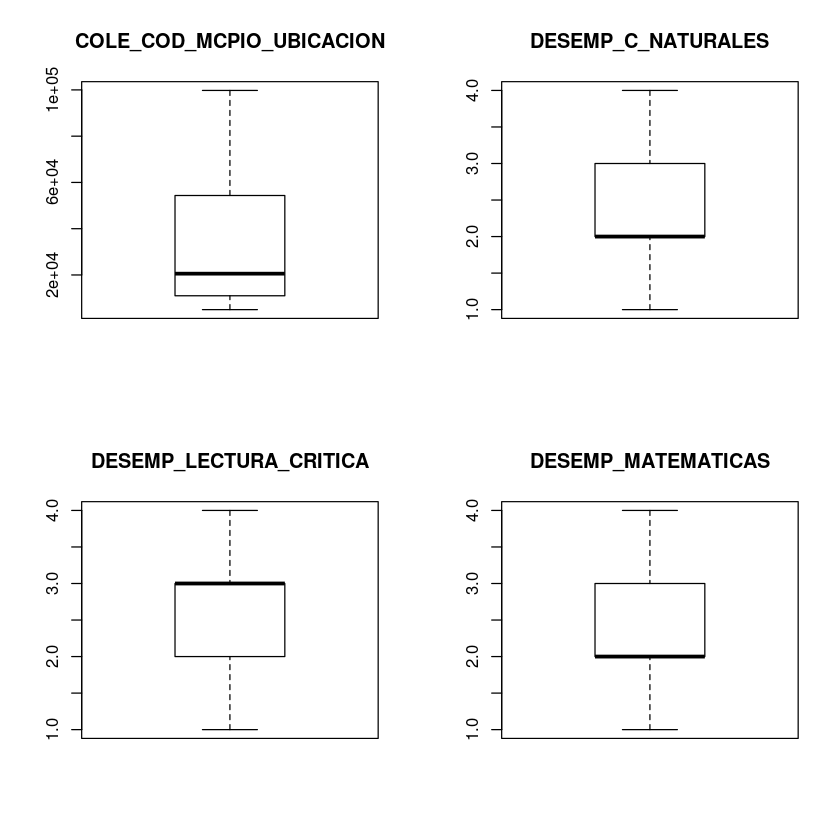

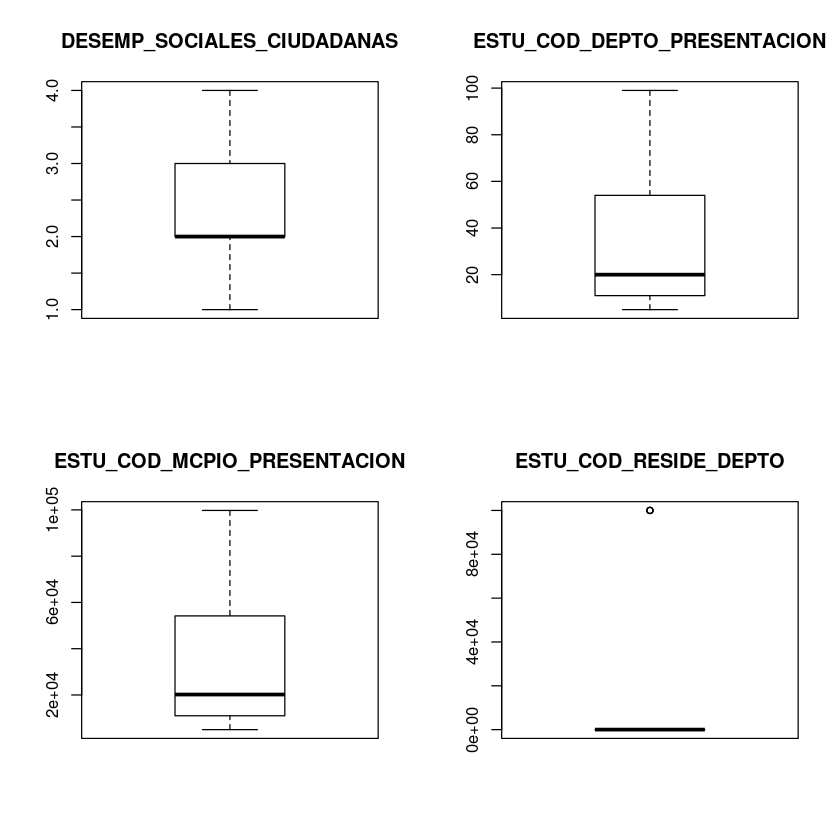

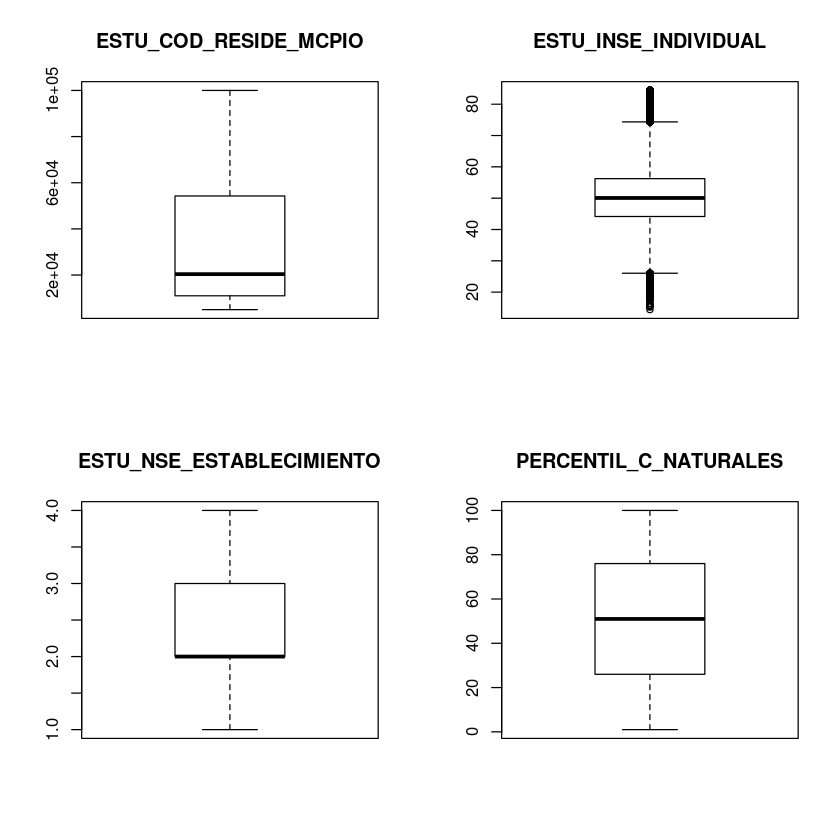

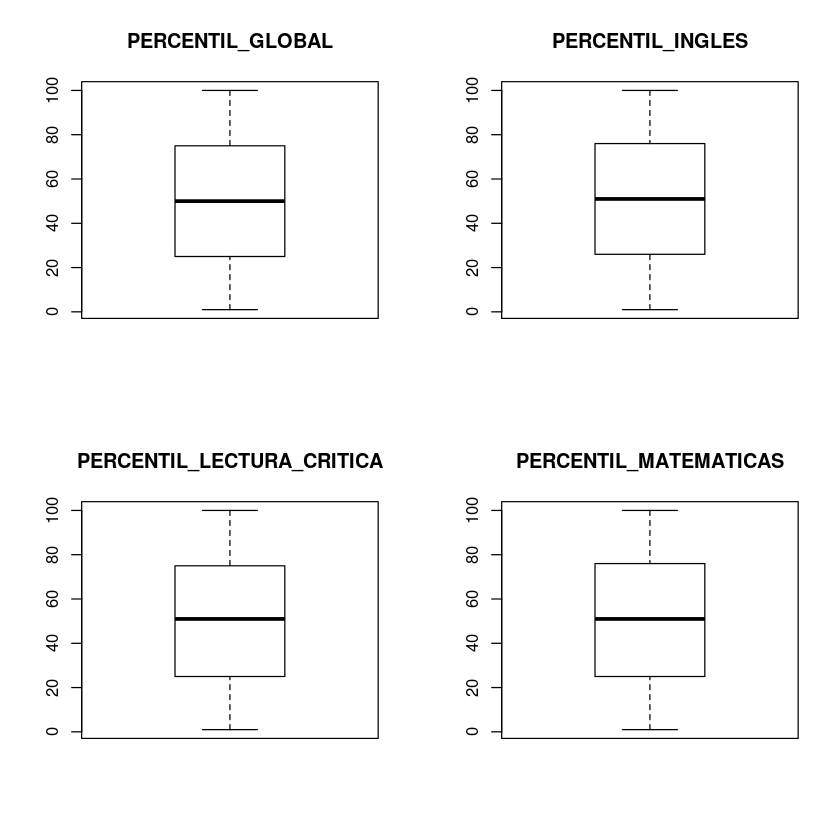

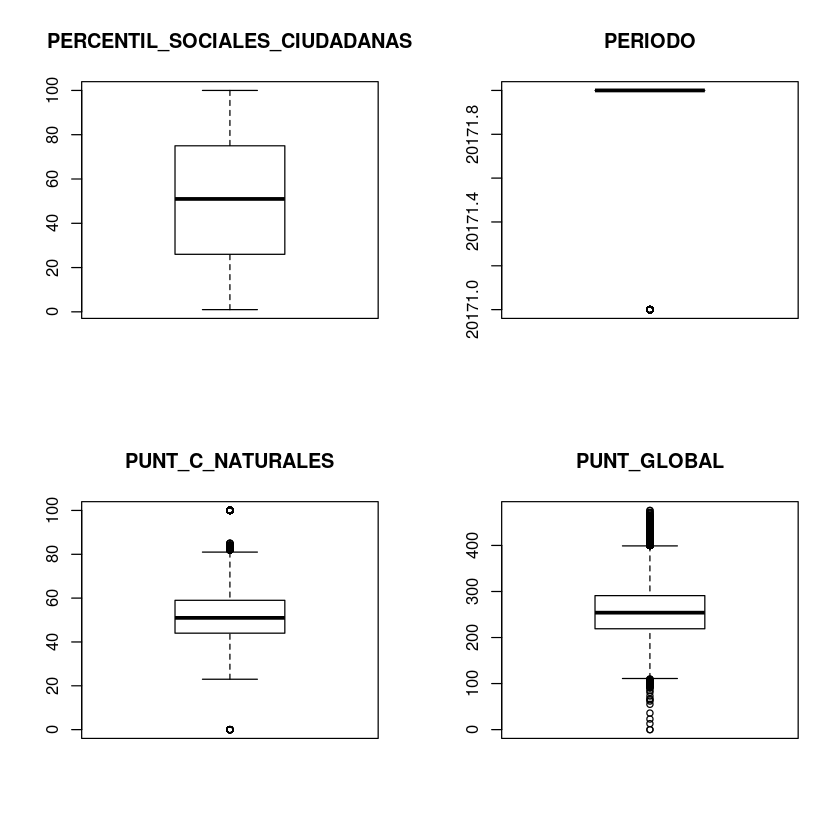

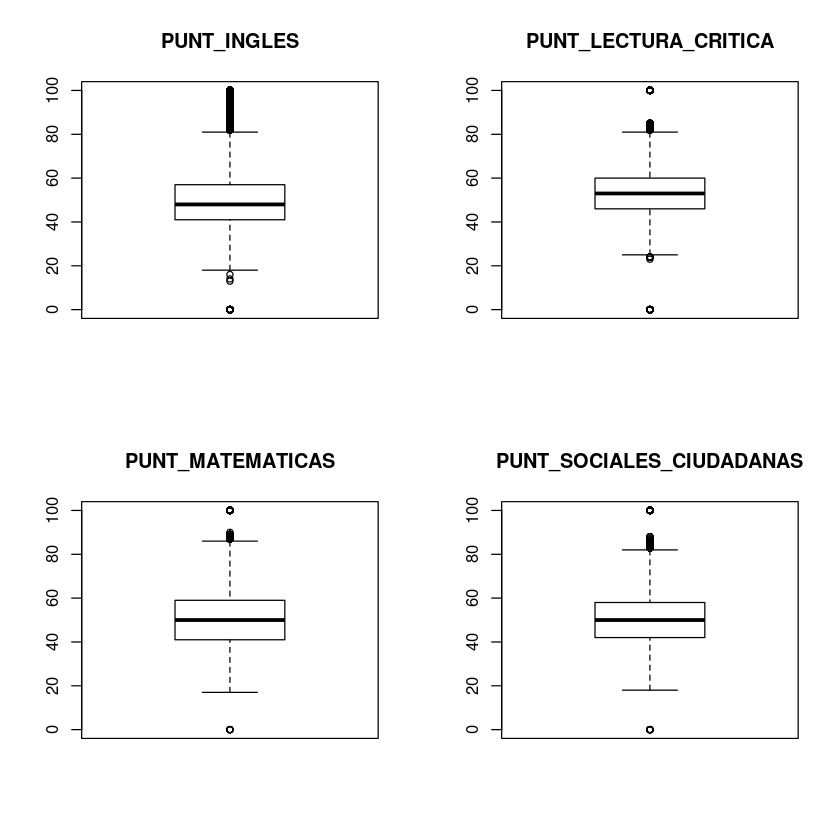

In [7]:
# Combine multiple plots
par(mfrow=c(2,2))

for(i in names(icfes[, ind])){
  boxplot(icfes[[i]], main=i)
}